In [1]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
import sqlite3
import pandas as pd
# Conecte-se ao banco de dados (ou crie um novo arquivo de banco de dados)
conexao = sqlite3.connect('ctacte.db')



In [101]:
# Leia o arquivo CSV usando pandas
dfctacte = pd.read_csv('ctacte.csv',sep=';',header = 0)
#display(dfctacte)
#display(dfctacte.head())
#display(dfctacte.shape)
#display(dfctacte.describe())
display(dfctacte.dtypes)
dfctacte['DATA'] = pd.to_datetime(dfctacte['DATA'], format='%d/%m/%Y')
dfctacte['VALOR'] = dfctacte['VALOR'].str.replace(',', '.')
dfctacte['VALOR'] = dfctacte['VALOR'].astype(float)
display(dfctacte.dtypes)
display(dfctacte.describe())

CODIGO DA TRANSACAO    object
DATA                   object
TIPO                   object
DESCRICAO              object
VALOR                  object
dtype: object

CODIGO DA TRANSACAO            object
DATA                   datetime64[ns]
TIPO                           object
DESCRICAO                      object
VALOR                         float64
dtype: object

,DATA,VALOR
count,679,679.000000
mean,2024-11-30 19:34:54.256259328,3.978483
min,2024-11-01 00:00:00,-2083.000000
25%,2024-11-14 00:00:00,-59.900000
50%,2024-12-02 00:00:00,-20.690000
75%,2024-12-16 00:00:00,-4.950000
max,2024-12-31 00:00:00,2720.000000
std,NaN,384.148723


In [113]:
dfdesc_valor = dfctacte[['DESCRICAO','VALOR','DATA']]
display(dfdesc_valor)

,DESCRICAO,VALOR,DATA
0,Jaine Franco Alves,1000.00,2024-11-01
1,Silvia Ferraz Lemos,-6.99,2024-11-01
2,Silvia Ferraz Lemos,-35.68,2024-11-01
3,Pix Marketplace,-38.30,2024-11-01
4,Jaine Franco Alves,-14.00,2024-11-01
...,...,...,...
674,Silvia Ferraz Lemos,-28.35,2024-12-31
675,Acacio De Souza Ramos,-17.74,2024-12-31
676,Edivaldo Pereira Brito,-9.80,2024-12-31
677,Andreia Paraguai Santos,-30.00,2024-12-31


In [161]:
#display(dfdesc_valor.loc [dfdesc_valor['DESCRICAO']== 'Mateus'] )
#display(dfdesc_valor.loc [dfdesc_valor['VALOR']<=-500] )
#display(dfdesc_valor[dfdesc_valor['DESCRICAO'].str.match('Mateus')])
#display(dfdesc_valor[dfdesc_valor['DESCRICAO'].str.contains('mateus', case = False)])
#display(dfdesc_valor.loc [dfdesc_valor['DESCRICAO'].str.match('Mateus')] )
dfselect = dfdesc_valor.loc [dfdesc_valor['DESCRICAO'].str.match('Mateus')]
print (dfselect)
display (sorted(dfselect.columns))
lsselsort =sorted(dfselect.columns)
dfselsort = dfselect.reindex(columns= lsselsort)
display(dfselsort)


                     DESCRICAO   VALOR       DATA
73   Mateus Supermercados Ltda   -5.48 2024-11-07
74   Mateus Supermercados Ltda   -6.39 2024-11-07
75   Mateus Supermercados Ltda -692.34 2024-11-07
279  Mateus Supermercados S.a. -676.07 2024-11-25


['DATA', 'DESCRICAO', 'VALOR']

,DATA,DESCRICAO,VALOR
73,2024-11-07,Mateus Supermercados Ltda,-5.48
74,2024-11-07,Mateus Supermercados Ltda,-6.39
75,2024-11-07,Mateus Supermercados Ltda,-692.34
279,2024-11-25,Mateus Supermercados S.a.,-676.07


In [164]:
import matplotlib.pyplot as plt

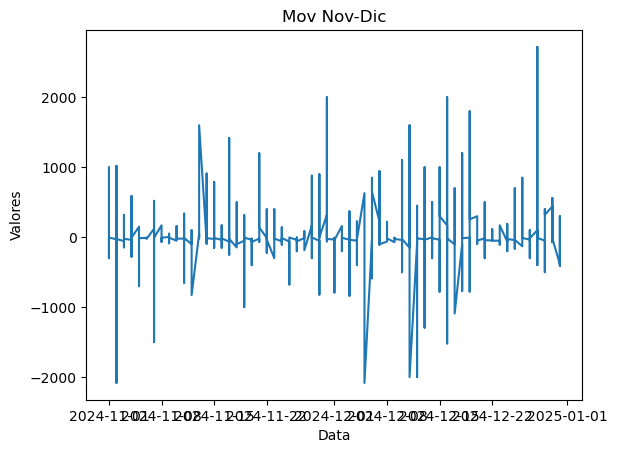

In [171]:
plt.plot(dfdesc_valor['DATA'], dfdesc_valor['VALOR'])
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Mov Nov-Dic')
plt.show()

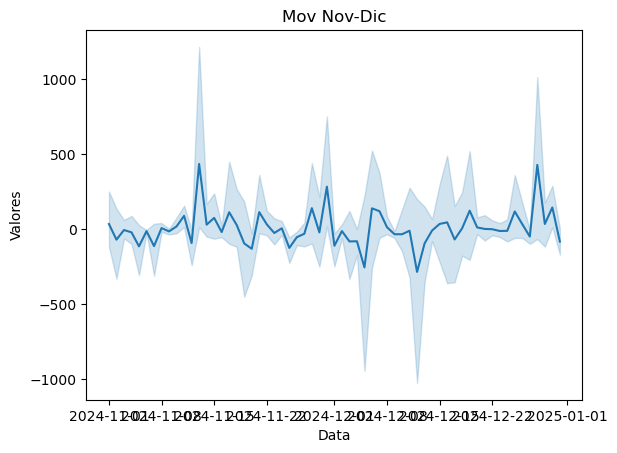

In [173]:
import seaborn as sns

# Plotar gráfico de linha com seaborn
sns.lineplot(data=dfdesc_valor, x='DATA', y='VALOR')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.title('Mov Nov-Dic')
plt.show()

In [177]:
# Exportar o DataFrame para um arquivo CSV com codificação UTF-8
dfdesc_valor.to_csv('mov_nov_dic.csv', index=False,)

In [183]:
# Exportar o DataFrame para uma tabela no banco de dados SQLite
dfdesc_valor.to_sql('dbtbmov_nov_dic', conexao, if_exists='replace', index=False)
# Fechar a conexão
conexao.close()

In [185]:
# Conectar-se ao banco de dados (substitua 'meu_banco_de_dados.db' pelo nome do seu banco de dados)
conexao = sqlite3.connect('ctacte.db')

# Ler a tabela (substitua 'minha_tabela' pelo nome da sua tabela)
df = pd.read_sql_query('SELECT * FROM dbtbmov_nov_dic', conexao)

# Exibir o DataFrame
print(df)

# Fechar a conexão
conexao.close()

                   DESCRICAO    VALOR                 DATA
0         Jaine Franco Alves  1000.00  2024-11-01 00:00:00
1        Silvia Ferraz Lemos    -6.99  2024-11-01 00:00:00
2        Silvia Ferraz Lemos   -35.68  2024-11-01 00:00:00
3            Pix Marketplace   -38.30  2024-11-01 00:00:00
4         Jaine Franco Alves   -14.00  2024-11-01 00:00:00
..                       ...      ...                  ...
674      Silvia Ferraz Lemos   -28.35  2024-12-31 00:00:00
675    Acacio De Souza Ramos   -17.74  2024-12-31 00:00:00
676   Edivaldo Pereira Brito    -9.80  2024-12-31 00:00:00
677  Andreia Paraguai Santos   -30.00  2024-12-31 00:00:00
678  Leandro Nascimento Dias  -280.00  2024-12-31 00:00:00

[679 rows x 3 columns]


In [189]:
# Conectar-se ao banco de dados (substitua 'meu_banco_de_dados.db' pelo nome do seu banco de dados)
conexao = sqlite3.connect('ctacte.db')

# Obter um cursor
cursor = conexao.cursor()

# Listar todas as tabelas no banco de dados
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tabelas = cursor.fetchall()
print("Tabelas no banco de dados:", tabelas)

# Obter estrutura de uma tabela específica (substitua 'minha_tabela' pelo nome da tabela)
cursor.execute("PRAGMA table_info(dbtbmov_nov_dic);")
colunas = cursor.fetchall()
print("Estrutura da tabela 'dbtbmov_nov_dic':", colunas)

# Fechar a conexão
conexao.close()


Tabelas no banco de dados: [('tbctacte',), ('dbtbmov_nov_dic',)]
Estrutura da tabela 'dbtbmov_nov_dic': [(0, 'DESCRICAO', 'TEXT', 0, None, 0), (1, 'VALOR', 'REAL', 0, None, 0), (2, 'DATA', 'TIMESTAMP', 0, None, 0)]
